# Import Important Libraries

In [1]:
import pandas as pd
from nltk.corpus import stopwords
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Read and Show The Dataset

In [3]:
data=pd.read_csv('news.csv')

In [4]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
data.shape

(6335, 4)

# Creating a dataframe

In [6]:
Y=data.label
data_frame=data.drop('label',axis=1)

In [7]:
data_frame.head()

,Unnamed: 0,title,text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...


In [8]:
Y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

# Split the dataset into train and test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data_frame['text'], Y, test_size=0.33, random_state=53)

# 1. Count Vectorizer

## Data Cleaning and Tokenization

In [10]:
cv=CountVectorizer(stop_words='english')
count_train = cv.fit_transform(X_train)
count_test = cv.transform(X_test)

In [11]:
cv.get_feature_names()[:10]

['00',
 '000',
 '0000',
 '00000031',
 '000035',
 '00006',
 '0001',
 '0001pt',
 '000ft',
 '000km']

In [18]:
count_df = pd.DataFrame(count_train.A, columns=cv.get_feature_names())

In [19]:
count_df.head()



,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2. TFIDF Vectorizer

In [20]:
tfidf_vectorizer =TfidfVectorizer()
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [21]:
tfidf_vectorizer.get_feature_names()[:10]

['00',
 '000',
 '0000',
 '00000031',
 '000035',
 '00006',
 '0001',
 '0001pt',
 '000ft',
 '000km']

In [22]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [24]:
tfidf_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#  Model Building

## 1. MultinomialNB Model 

### 1.1 Multinomial Model with Count Vectorize

In [26]:
for alfa in np.arange(1,10):   
    clf = MultinomialNB(alfa)
    clf.fit(count_train, y_train)
    pred1 = clf.predict(count_test)
    score = metrics.accuracy_score(y_test, pred1)
    print("for alfa=",alfa,'score=',score*100)    

for alfa= 1 score= 89.3352462936394
for alfa= 2 score= 89.04830224772836
for alfa= 3 score= 88.18747010999522
for alfa= 4 score= 87.2309899569584
for alfa= 5 score= 86.80057388809182
for alfa= 6 score= 86.37015781922524
for alfa= 7 score= 85.55714968914396
for alfa= 8 score= 85.22238163558106
for alfa= 9 score= 84.98326159732186


Confusion matrix, without normalization


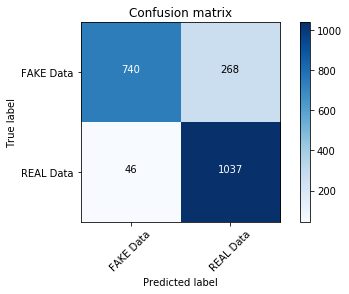

In [27]:
cm = metrics.confusion_matrix(y_test, pred1)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### 1. 2 Multinomial Model with TFIDF Vectorizer

In [28]:
for alfa in np.arange(1,11):   
    clf = MultinomialNB(alfa)
    clf.fit(tfidf_train, y_train)
    pred2 = clf.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred2)
    print("for alfa =",alfa,'Accuracy =',score*100,'%')

for alfa = 1 Accuracy = 85.65279770444764 %
for alfa = 2 Accuracy = 82.73553323768532 %
for alfa = 3 Accuracy = 81.34863701578192 %
for alfa = 4 Accuracy = 79.77044476327116 %
for alfa = 5 Accuracy = 78.71831659493066 %
for alfa = 6 Accuracy = 77.9531324725012 %
for alfa = 7 Accuracy = 77.47489239598279 %
for alfa = 8 Accuracy = 76.80535628885701 %
for alfa = 9 Accuracy = 76.13582018173123 %
for alfa = 10 Accuracy = 75.89670014347202 %


Confusion matrix, without normalization


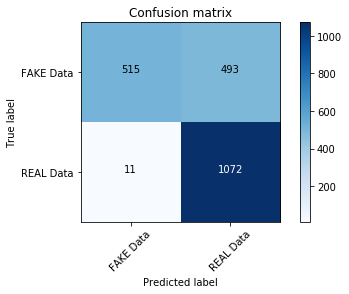

In [29]:
cm = metrics.confusion_matrix(y_test, pred2)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

## 2. Passive Aggressive Classifier

### 2.1 Passive Aggressive Classifier with Count Vectorizer

In [30]:
for alfa in np.arange(1,11):   
    clf = PassiveAggressiveClassifier(alfa)
    clf.fit(count_train, y_train)
    pred3 = clf.predict(count_test)
    score = metrics.accuracy_score(y_test, pred3)
    print("for alfa =",alfa,'Accuracy =',score*100,"%")

for alfa = 1 Accuracy = 89.23959827833573 %
for alfa = 2 Accuracy = 89.38307030129124 %
for alfa = 3 Accuracy = 89.47871831659494 %
for alfa = 4 Accuracy = 89.43089430894308 %
for alfa = 5 Accuracy = 89.38307030129124 %
for alfa = 6 Accuracy = 89.43089430894308 %
for alfa = 7 Accuracy = 89.1917742706839 %
for alfa = 8 Accuracy = 89.43089430894308 %
for alfa = 9 Accuracy = 89.28742228598756 %
for alfa = 10 Accuracy = 89.43089430894308 %


Confusion matrix, without normalization


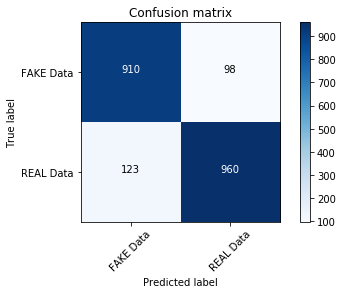

In [31]:
cm = metrics.confusion_matrix(y_test, pred3)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### 2.2 Passive Aggressive Classifier with TFIDF Vectorizer

In [32]:
for alfa in np.arange(1,11):   
    clf = PassiveAggressiveClassifier(alfa)
    clf.fit(tfidf_train, y_train)
    pred4 = clf.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred4)
    print("for alfa =",alfa,'Accuracy =',score*100,"%")

for alfa = 1 Accuracy = 93.87852702056433 %
for alfa = 2 Accuracy = 93.44811095169774 %
for alfa = 3 Accuracy = 93.68723098995696 %
for alfa = 4 Accuracy = 93.4959349593496 %
for alfa = 5 Accuracy = 93.68723098995696 %
for alfa = 6 Accuracy = 93.30463892874224 %
for alfa = 7 Accuracy = 93.63940698230512 %
for alfa = 8 Accuracy = 93.63940698230512 %
for alfa = 9 Accuracy = 93.44811095169774 %
for alfa = 10 Accuracy = 93.44811095169774 %


Confusion matrix, without normalization


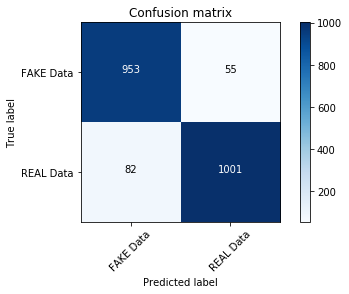

In [35]:
cm = metrics.confusion_matrix(y_test, pred4)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [37]:
clf = PassiveAggressiveClassifier(4)
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy =',score*100,"%")


Accuracy = 93.4002869440459 %


### By using PassiveAggressive Classiffier with TFIDF vectorizer we got 93% Accuracy